In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import pandas as pd

In [2]:
dir_name = os.getcwd()
file_name = "Data_Case0_6bus_Async_Unbalanced"
Data = sio.loadmat(dir_name + '/Data/' + file_name)

In [3]:
P = pd.DataFrame()
for n in range(6):
    P[str(n+1)] = Data["P"][n][0][0:720]+Data["P"][n][1][0:720]+Data["P"][n][2][0:720]
P.index = pd.date_range('2018-01-01', periods=720, freq='2min')
Q = pd.DataFrame()
for n in range(6):
    Q[str(n+1)] = np.real(Data["Q"][n][0][0:720]+Data["Q"][n][1][0:720]+Data["Q"][n][2][0:720])
Q.index = pd.date_range('2018-01-01', periods=720, freq='2min')
P

,1,2,3,4,5,6
2018-01-01 00:00:00,67.896008,15.212316,0.803613,8.711118,18.513552,3.385283
2018-01-01 00:02:00,66.791782,15.155678,0.784547,8.730086,18.333024,3.290319
2018-01-01 00:04:00,67.293625,15.133459,0.792186,8.641006,18.389563,3.442597
2018-01-01 00:06:00,68.606463,15.501469,0.783408,8.562244,18.610164,3.548913
2018-01-01 00:08:00,72.367866,15.792063,0.997338,8.497821,18.672088,3.521668
...,...,...,...,...,...,...
2018-01-01 23:50:00,65.025853,15.326138,1.217054,1.337313,25.318872,1.606254
2018-01-01 23:52:00,65.820849,15.097140,1.248187,1.342434,25.183689,1.491680
2018-01-01 23:54:00,65.728939,16.910945,1.251334,1.311333,24.892111,1.429178
2018-01-01 23:56:00,68.794529,15.081624,2.709676,1.343995,25.759202,1.406700


In [4]:
Pn = pd.DataFrame()
Pn["1"] = P["1"]-P["2"]-P["4"]-P["5"]
Pn["2"] = P["2"]-P["3"]
Pn["3"] = P["3"]
Pn["4"] = P["4"]
Pn["5"] = P["5"]-P["6"]
Pn["6"] = P["6"]
Qn = pd.DataFrame()
Qn["1"] = Q["1"]-Q["2"]-Q["4"]-Q["5"]
Qn["2"] = Q["2"]-Q["3"]
Qn["3"] = Q["3"]
Qn["4"] = Q["4"]
Qn["5"] = Q["5"]-Q["6"]
Qn["6"] = Q["6"]

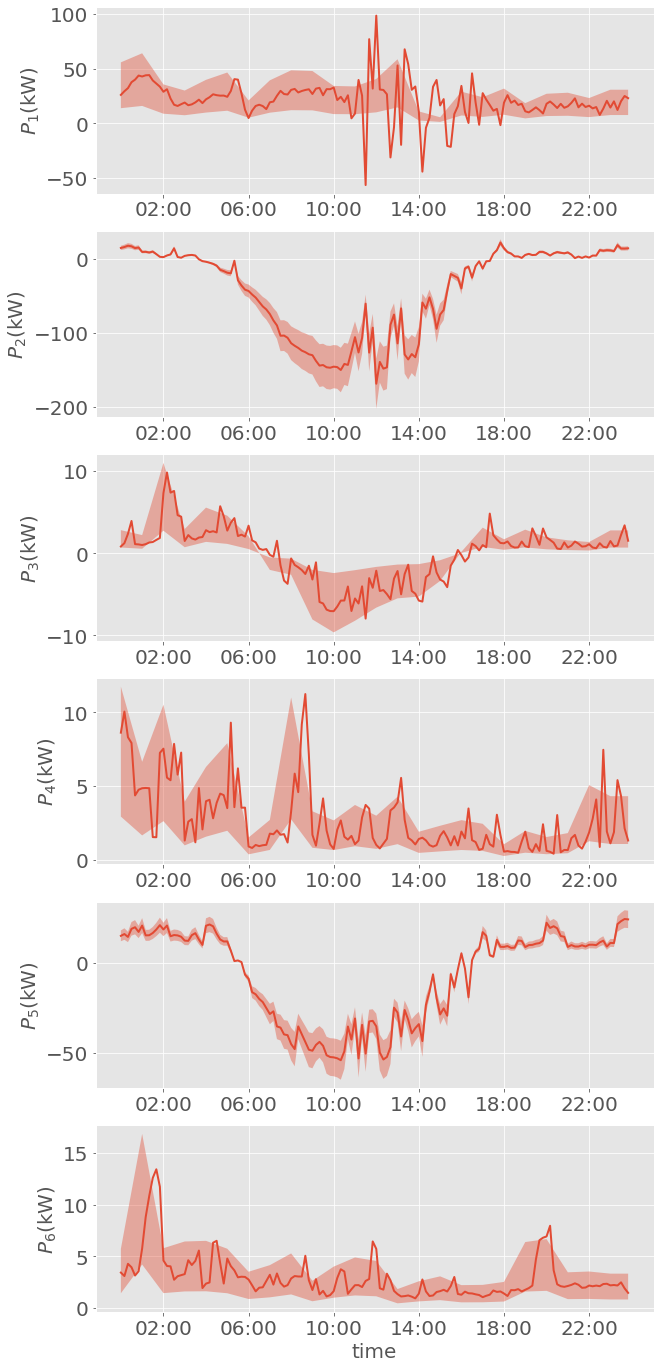

In [5]:
Pn = Pn.resample('10MIN').mean()
w, h = 10, 4
plt.style.use('ggplot')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
times = pd.date_range('01-01-2018', periods=144, freq='10MIN')
x_lab = times.strftime('%H:%M')
times = pd.date_range('01-01-2018 02:00', periods=6, freq='4H')
x_tik = times.strftime('%H:%M')
Fig = plt.figure()
Fig.set_figheight(h * 6)
Fig.set_figwidth(w)
ax = {}
for n in range(6):
    ax[n] = Fig.add_subplot(6, 1, n + 1)
    ax[n].plot(x_lab, Pn[str(n+1)], linewidth=2, linestyle='-')
    ax[n].set_ylabel("$P_{}$".format(n+1) + "(kW)", fontsize=20)
    plt.sca(ax[n])
    plt.xticks(x_tik, x_tik)
ax[n].set_xlabel("time", fontsize=20)

Pnn = Pn.resample('1H').mean()
Pnn = Pnn.append(Pnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[0].fill_between(x_labb, Pnn["1"] *0.4, Pnn["1"] * 1.6, alpha=0.4);
ax[1].fill_between(x_lab, Pn["2"] *0.8, Pn["2"] * 1.2, alpha=0.4);
ax[2].fill_between(x_labb, Pnn["3"] *0.4, Pnn["3"] * 1.6, alpha=0.4);
ax[3].fill_between(x_labb, Pnn["4"] *0.4, Pnn["4"] * 1.6, alpha=0.4);
ax[4].fill_between(x_lab, Pn["5"] *0.8, Pn["5"] * 1.2, alpha=0.4);
ax[5].fill_between(x_labb, Pnn["6"] *0.4, Pnn["6"] * 1.6, alpha=0.4);
plt.savefig('./Figures/' + 'P_load.png', bbox_inches='tight')

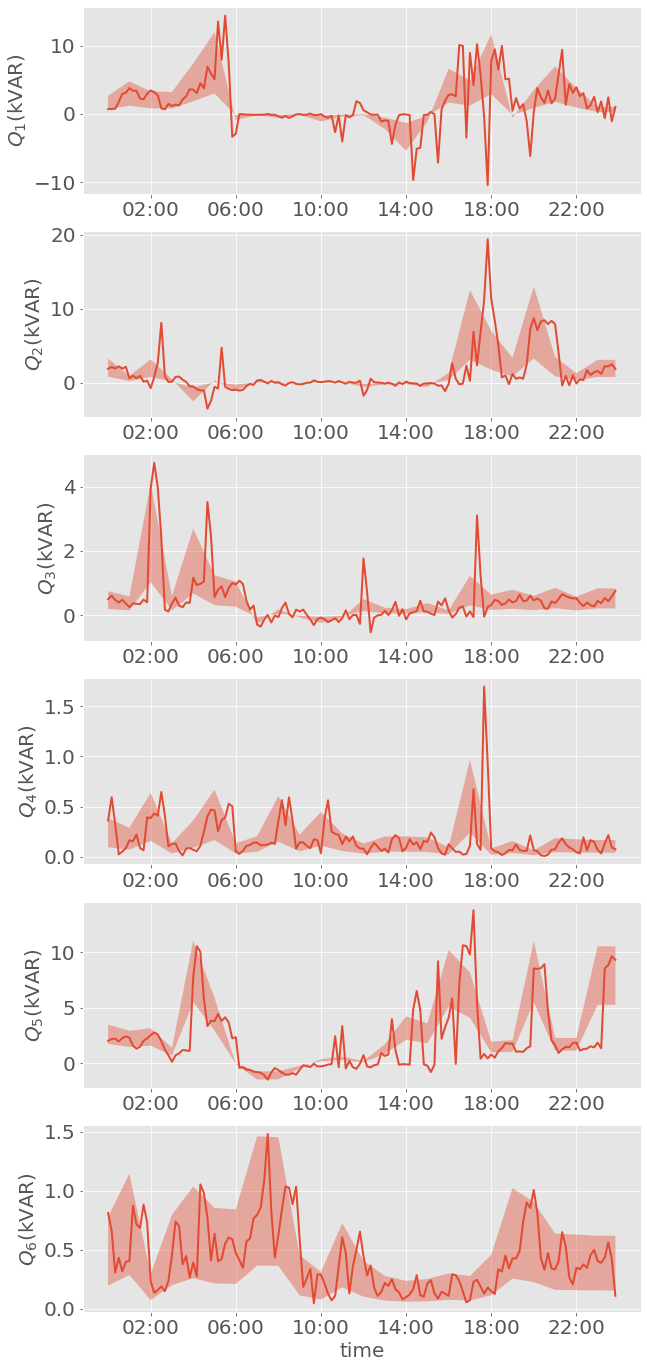

In [6]:
Qn = Qn.resample('10MIN').mean()
w, h = 10, 4
plt.style.use('ggplot')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
times = pd.date_range('01-01-2018', periods=144, freq='10MIN')
x_lab = times.strftime('%H:%M')
times = pd.date_range('01-01-2018 02:00', periods=6, freq='4H')
x_tik = times.strftime('%H:%M')
Fig = plt.figure()
Fig.set_figheight(h * 6)
Fig.set_figwidth(w)
ax = {}
for n in range(6):
    ax[n] = Fig.add_subplot(6, 1, n + 1)
    ax[n].plot(x_lab, Qn[str(n+1)], linewidth=2, linestyle='-')
    ax[n].set_ylabel("$Q_{}$".format(n+1) + "(kVAR)", fontsize=20)
    plt.sca(ax[n])
    plt.xticks(x_tik, x_tik)
ax[n].set_xlabel("time", fontsize=20)

Qnn = Qn.resample('1H').mean()
Qnn = Qnn.append(Qnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[0].fill_between(x_labb, Qnn["1"] *0.4, Qnn["1"] * 1.6, alpha=0.4);
ax[1].fill_between(x_labb, Qnn["2"] *0.4, Qnn["2"] * 1.6, alpha=0.4);
ax[2].fill_between(x_labb, Qnn["3"] *0.4, Qnn["3"] * 1.6, alpha=0.4);
ax[3].fill_between(x_labb, Qnn["4"] *0.4, Qnn["4"] * 1.6, alpha=0.4);
ax[4].fill_between(x_labb, Qnn["5"] *0.8, Qnn["5"] * 1.6, alpha=0.4);
ax[5].fill_between(x_labb, Qnn["6"] *0.4, Qnn["6"] * 1.6, alpha=0.4);
plt.savefig('./Figures/' + 'Q_load.png', bbox_inches='tight')

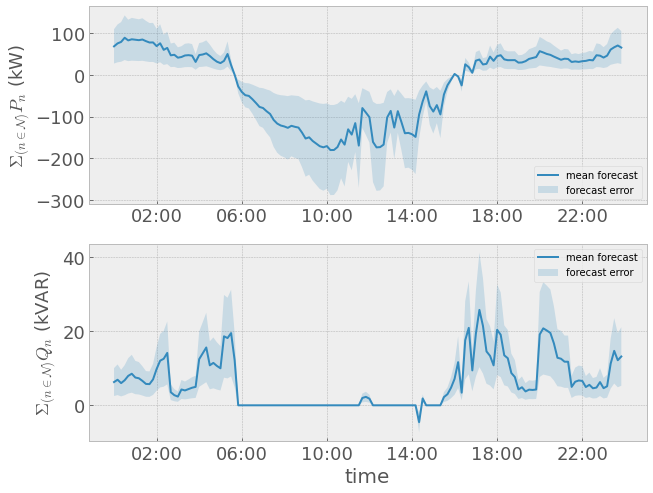

In [7]:
w, h = 10, 4
plt.style.use('bmh')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
times = pd.date_range('01-01-2018', periods=144, freq='10MIN')
x_lab = times.strftime('%H:%M')
times = pd.date_range('01-01-2018 02:00', periods=6, freq='4H')
x_tik = times.strftime('%H:%M')
Fig = plt.figure()
Fig.set_figheight(h * 2)
Fig.set_figwidth(w)
ax = {}

ax[0] = Fig.add_subplot(2, 1, 1)
ax[0].plot(x_lab, Pn["1"] + Pn["2"] + Pn["3"] + Pn["4"] + Pn["5"] + Pn["6"], linewidth=2, linestyle='-')
ax[0].set_ylabel("$\Sigma_{(n\in\mathcal{N})}P_{n} $ " + "(kW)", fontsize=18)
plt.sca(ax[0])
plt.xticks(x_tik, x_tik)
Pnn = Pn.resample('1H').mean()
Pnn = Pnn.append(Pnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[0].fill_between(x_lab, (Pn["1"] + Pn["2"] + Pn["3"] + Pn["4"] + Pn["5"] + Pn["6"]) *0.4,
                   (Pn["1"] + Pn["2"] + Pn["3"] + Pn["4"] + Pn["5"] + Pn["6"]) * 1.6, alpha=0.2);
ax[0].legend(['mean forecast', 'forecast error'], loc='lower right')


ax[1] = Fig.add_subplot(2, 1, 2)
ax[1].plot(x_lab, Qn["1"] + Qn["2"] + Qn["3"] + Qn["4"] + Qn["5"] + Qn["6"], linewidth=2, linestyle='-')
ax[1].set_ylabel("$\Sigma_{(n\in\mathcal{N})}Q_{n} $ " + "(kVAR)", fontsize=18)
plt.sca(ax[1])
plt.xticks(x_tik, x_tik)
Qnn = Qn.resample('1H').mean()
Qnn = Qnn.append(Qnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[1].fill_between(x_lab, (Qn["1"] + Qn["2"] + Qn["3"] + Qn["4"] + Qn["5"] + Qn["6"]) *0.4,
                   (Qn["1"] + Qn["2"] + Qn["3"] + Qn["4"] + Qn["5"] + Qn["6"]) * 1.6, alpha=0.2);
ax[1].legend(['mean forecast', 'forecast error'])

ax[1].set_xlabel("time", fontsize=20)

plt.savefig('./Figures/' + 'load.pdf', bbox_inches='tight')

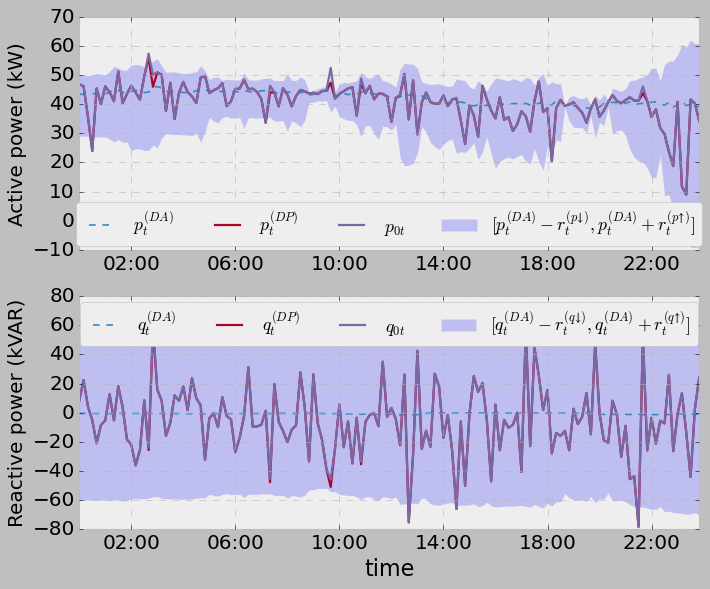

In [13]:
DA_P = pd.DataFrame()
DA_P['c'] = [-43.47277277649846,  -43.383577969972976,  -43.41737602557987,  -43.517736380919814,  -43.81982708279975,  -43.64199158351403,  -43.51156519842334,  -44.113672396633774,  -44.98225236707367,  -44.84339935076423,  -44.02218667301349,  -44.16293547488749,  -44.37530394026544,  -44.69688555179164,  -44.57475383358542,  -44.00757211679593,  -44.203995410352945,  -45.90432362013962,  -46.08424760994967,  -45.557667437940836,  -44.42468847834971,  -44.48246012593154,  -44.48173281142954,  -44.2518412853824,  -44.045233859098516,  -44.02069995936472,  -44.2229490429163,  -44.61289298301563,  -45.09772401803639,  -44.97816941270139,  -44.50540002027992,  -44.62835111725144,  -44.45870140125044,  -44.299407597165555,  -44.65277556772344,  -44.31827747647185,  -44.34218369971495,  -44.31534198659938,  -44.75301302142907,  -44.40154746477492,  -44.29665593151003,  -44.28868043515831,  -44.60145997267682,  -44.69896373350639,  -44.87195817264728,  -43.86177932959981,  -43.86168244632427,  -43.849897448555566,  -44.356616219040006,  -43.88403521163855,  -43.67241545591969,  -44.08657401322853,  -44.12043035880197,  -43.163110639783554,  -43.43839917448349,  -44.05747522925958,  -44.389725998044014,  -44.53327493311372,  -45.15122558712028,  -42.768650633166544,  -43.373370859306306,  -43.70388371439185,  -43.32789920538198,  -43.61439471645281,  -43.36252548568882,  -44.18066911166534,  -44.21040621341672,  -43.85415656818077,  -43.56186973990407,  -43.52976626018062,  -43.260599594796076,  -42.91422674397472,  -42.12413477036171,  -41.95307175384369,  -42.599179681856185,  -43.20010210201144,  -43.103533964953385,  -43.205519407754764,  -43.30980855808593,  -42.90802595007699,  -41.95728961774148,  -40.626145354588516,  -40.29461981134955,  -40.06418912217487,  -40.110751952044666,  -40.39850960904732,  -40.625997467548586,  -40.82955606887117,  -40.76391602912918,  -40.47677057469264,  -39.41017974098213,  -39.48505333997309,  -39.741589409764856,  -39.520041225943714,  -39.6444509770954,  -39.57743961841334,  -39.457784140249714,  -39.910213866853155,  -40.07019913883414,  -39.95078653958626,  -40.22944008896593,  -40.23001029144507,  -40.05490070220549,  -40.31798599800095,  -39.72304683481343,  -39.82623186602723,  -40.35579382313881,  -40.22644594672602,  -39.89255745674018,  -39.8158754799515,  -41.100385139347054,  -40.88701745623257,  -39.38698148983531,  -39.87154229008593,  -39.65815766796004,  -38.995162433129735,  -38.800214812741615,  -38.807323239627294,  -38.49447393429,  -38.50680449383799,  -39.070180363138206,  -40.23194855521433,  -40.52323458716273,  -40.683826078660786,  -40.558339559007436,  -40.34898517385591,  -40.37836464855354,  -40.802730028750375,  -40.042113322298974,  -40.087717582588084,  -40.37458993890323,  -40.20183132472448,  -40.75129883654881,  -40.78671110118739,  -40.16731415595859,  -39.66689195635263,  -40.64788130123634,  -39.06316011399031,  -39.81124056922272,  -40.96947532251943,  -39.554442692082375,  -39.99688336753752,  -39.09190837049391,  -39.26069031935185]
DA_P['c'] = [-elem for elem in DA_P['c']]
DA_P['r+'] = [6.489805302263063,  6.465650408740115,  6.4560910711551855,  6.613536905926234,  6.738008488389087,  6.712851720291466,  6.612923536857002,  7.2455948488398745,  8.062101906089966,  7.6367978680145665,  7.652715473026401,  7.707840465586539,  9.164859293860628,  8.967946448844424,  8.931601000915954,  8.92725418051704,  9.000345139483995,  8.973861069907164,  9.48684686983693,  7.731495193613741,  6.5108881805172825,  6.641600029872793,  6.650720496794203,  6.566615499257059,  6.537002090399836,  6.546029567076288,  6.7421478165675826,  6.535903527507452,  8.15172255618122,  6.511679601356086,  4.035916197221685,  4.6853514069142985,  4.881424379849729,  3.9956273596000678,  3.949477009060277,  4.1162213248873085,  4.05879142321342,  4.023795593150558,  5.886618955037598,  4.06074915345411,  4.018819678151817,  4.068471119775404,  4.114419915373581,  4.1961821951665055,  4.184981534750411,  4.337067635415147,  4.310405538475701,  4.271826738222481,  6.11895648086517,  4.316061480989314,  4.51873709524123,  5.301450820282879,  4.363046229076889,  1.1596845305950518,  1.2730785631041652,  1.2588243946808515,  1.5141666345236662,  1.4348834886206185,  3.5413156607402385,  1.561320137317141,  3.394507048771956,  3.884435712671054,  3.998351862495818,  4.090410729323864,  4.691160910339545,  6.86958890048179,  5.1993623246715,  5.030499353671403,  6.151332203613773,  6.976776827718719,  4.833367059438675,  4.816615419324191,  4.962025637452138,  3.9963001428753078,  9.41400721270526,  10.93590891092398,  10.795026892188309,  10.527811509701348,  9.051805024689639,  4.777688036890283,  5.177427217355929,  6.203225380775963,  6.711678293756159,  7.010788031007077,  6.262109185909405,  5.793280291614489,  5.659024881509202,  7.949751232125299,  7.631541124029958,  7.663873111830808,  6.526503737266443,  5.751800221130764,  8.411627981529202,  7.171547209002259,  4.874646189416117,  7.422531796192413,  9.623776044035084,  8.812173473331473,  8.42321613575324,  8.1197205960024,  8.547066155811704,  8.152878296324838,  7.78272769095375,  8.941127400189721,  9.10510106156444,  6.797178923795985,  9.013986901463992,  10.291463256877979,  6.402714637666822,  8.019313225310079,  5.991397892319876,  6.196246610171442,  0.16338875444543666,  2.542407183058899,  3.384216197978206,  3.1422646043614626,  3.0815710151816895,  3.896955331322151,  1.1055794322871861,  4.579117703293714,  2.391819680089842,  3.4198997588513915,  0.6901252213234567,  4.9166038970368495,  4.3456240557716255,  4.118103724007318,  4.963635484254483,  7.333482469518426,  8.205923593303403,  8.810040708679042,  9.060942263454278,  9.943042500386936,  11.689383293432035,  11.671159351692861,  7.973072004373152,  13.974995524443525,  14.269685506381684,  15.777830139734062,  17.116789911911066,  19.629377566819457,  20.061049703013047,  22.094194650366948,  21.69874130724437,  21.670601003881433]
DA_P['c+'] = DA_P['r+'] + DA_P['c']
DA_P['r-'] = [14.455524304076834,  14.401721197522008,  14.380428647256412,  14.7311259660699,  15.008375702906303,  14.952339006037576,  14.729755902460022,  16.138980639364036,  17.957690666698362,  17.010354445553354,  17.045808024307625,  17.16859478843355,  20.413989161121762,  19.975382790556143,  19.894426119503148,  19.88474338769439,  20.047547326241805,  19.98855712267662,  21.13119187038778,  17.221289460739893,  14.502473025570248,  14.793624814852418,  14.81394173772685,  14.62660543917474,  14.560645460986764,  14.580755570294677,  15.017597824819715,  14.558204810231926,  18.15731427013107,  14.504249530180786,  8.989689742483606,  10.436251900167356,  10.872987370588953,  8.899949937757716,  8.797153861203023,  9.168563510863875,  9.04064312246835,  8.962692779319413,  13.111970709684407,  9.04500396468639,  8.951609430537815,  9.062204054189877,  9.16455136662248,  9.34667025653819,  9.321721663799503,  9.660480946247567,  9.601093113718353,  9.515161791563377,  13.62947878377609,  9.613690511153386,  10.065132517650698,  11.80855297328918,  9.718344142803613,  2.583110815220261,  2.8356871596752606,  2.803937068275385,  3.3726919666004176,  3.1960949129027716,  7.888006907193139,  3.4777226668384,  7.561002408919477,  8.652279418971837,  8.906018600538363,  9.111072436599223,  10.449195064144503,  15.301456678786016,  11.581172614472475,  11.205044865756609,  13.701606845787135,  15.54021100858089,  10.765948479324601,  10.728635493390968,  11.052525168504191,  8.901448555704812,  20.968951661190417,  24.358853958902113,  24.04505078608102,  23.449850424969515,  20.162175923796685,  10.641920833536139,  11.531523749924919,  13.813166187583532,  14.945087627787993,  15.610961359345499,  13.943872392253299,  12.899927898796806,  12.600980502544662,  17.701756274784838,  16.99319540757367,  17.065188014361947,  14.532582759777872,  12.807547288320562,  18.730192829958852,  15.968900326073424,  10.854386523129305,  16.527767244526707,  21.429284578350277,  19.62208553399468,  18.755992361484484,  18.08019779732062,  19.03176889669886,  18.154030064091142,  17.329816409880294,  19.909227057712737,  20.27434886025568,  15.135295186590463,  20.071466241980964,  22.91602479541897,  14.256623301119816,  17.85622510425139,  13.340723020058133,  13.796762857918955,  0.36380698603049566,  5.661005767278749,  7.535404690061524,  6.996667444826712,  6.861525084897748,  8.677085868686245,  2.4617191918771595,  10.196010285400352,  5.3257022140646,  7.6148584441085925,  1.5366549611063975,  10.947467661328977,  9.676105685307393,  9.169501608218795,  11.052189597651527,  16.32896639381249,  18.27157150616653,  19.616717835405105,  20.175383171210772,  22.139495500828996,  26.027953149413932,  25.98737507396538,  17.75309644737489,  31.117169097200566,  31.773335055639983,  35.131416504781676,  38.11278550929878,  43.70738963656056,  44.668566011910315,  49.195626120015966,  48.31513140159809,  48.25243409083577]
DA_P['c-'] = - DA_P['r-'] + DA_P['c']
DA_P['a'] = [-46.82624541870131, -46.24667503583334, -35.74931847967991, -23.949467217673615, -45.45912885631394, -40.0384910444208, -46.167800381907284, -44.120420605277175, -41.05503181442849, -51.32462520534127, -40.36677883341197, -43.56969421594052, -46.373307311955486, -44.07187315634205, -41.59451343980384, -49.69061442727956, -55.84704186620163, -46.00501122268565, -50.96809430673835, -50.13475294224901, -37.69133855626067, -47.3991455010806, -34.92887785082234, -44.011572148547565, -47.69242435949615, -44.174646362025626, -42.70733831064357, -40.41840385866836, -49.14228331742068, -49.798179437314815, -43.827963525918754, -44.80391790668992, -45.49251471124174, -47.26175772365103, -39.34752756768364, -41.02165784204763, -45.274495048130234, -45.364528824450254, -48.45021758675973, -45.200986198174164, -45.37293360345167, -44.250246261378614, -41.8247370941553, -33.639526285278876, -43.97794366585735, -44.158412842237915, -39.260068543512645, -45.50389516647008, -43.35771170195393, -39.2586445420505, -42.84152119014215, -44.9109371578064, -44.47031156828266, -43.690844696700694, -43.97285594918006, -43.49071173620008, -44.539003667276994, -44.6756571821938, -47.40009193287602, -41.95241796726059, -43.55114141984685, -44.49988011004645, -45.40111185433509, -45.920379007926364, -36.05910184513946, -47.116001232967164, -43.802138035009364, -46.37694445549848, -41.6555092079264, -43.646759153925224, -43.61575263932939, -42.622882077967, -33.92776986553457, -42.21358831294284, -43.188664083989416, -50.44716115746914, -34.79628953636093, -48.25720309888942, -29.64336290152291, -40.651438280672515, -44.02972446697284, -40.75996329805839, -40.170459906674225, -40.192686351073725, -43.015467599268206, -39.37264014369883, -41.66102677281766, -41.976551490176114, -34.45453150733673, -26.330001686364206, -39.67930552599704, -36.165400893748334, -28.83423378971666, -46.363589552218144, -41.671673086971275, -37.92264879299586, -35.11546970699462, -42.41206853599942, -34.62716522597181, -35.57922159591323, -30.823000403120275, -33.1007837950327, -37.61630837194892, -35.8685612596231, -30.559257215749142, -41.102975191106914, -47.809110953265446, -37.325676634501356, -38.64947728816519, -20.41012899774497, -38.642304288835376, -41.52853244153226, -39.56294255460505, -39.92730052088963, -40.66510377930925, -38.73092047700468, -37.10402947486463, -33.66857454401258, -38.63841041549731, -41.69952887422882, -35.70612384996872, -37.86398501862573, -40.7409949625806, -43.159197014452616, -41.133454880016586, -40.353572619562584, -41.42410198142136, -42.35623960547905, -41.28366434732086, -41.18074734939003, -43.80024840991537, -41.105324736758575, -35.63376260367525, -38.324779296320884, -31.842707540092487, -29.768618951163738, -23.67745392674063, -18.755496116633665, -40.82120311129211, -11.782094837148222, -8.913177070071605, -41.637149464009006, -40.22594347755576, -34.23342165021347]
DA_P['a'] = [-elem for elem in DA_P['a']]
DA_P['dev'] = [2.1280207478306195e-10, 3.0637951867248075e-10, 8.900046322990487e-12, 9.870476931402108e-13, 4.70247491563741e-10, 2.1165731822962512e-10, 5.161452139618928e-10, 1.1926397208587397e-09, 4.76074670920102e-10, 1.016486736116918e-09, 1.6637659406710475e-10, 1.1699343273678688e-10, 2.097118350981896e-09, 4.736989680712507e-08, 4.204035538479741e-08, 3.6253270681338407e-11, 1.5499382290103645, 4.141918432487412, 1.4268902195826398e-09, 1.054907299371516e-10, 9.062588423853818e-10, 1.0850654202488558e-07, 4.2665251005928534e-12, 1.4037362820482375e-10, 1.5424549640661608e-10, 1.6228494185685155e-09, 2.831785450858846e-12, 5.199436092053519e-10, 3.264578505778086e-12, 2.3259406954139003e-09, 3.547790827928477e-10, 2.7722505699141825e-12, 7.286611365048561e-12, 2.6493229881070575e-09, 2.1063816209775062e-10, 6.276340926403236e-07, 3.4062094503813704e-10, 1.6501913645260266e-09, 6.165517721956944e-08, 9.476884146413414e-11, 4.1821666202318383e-10, 5.458482012486529e-10, 3.296269348997646e-09, 2.178984820568549e-10, 2.444297560948119, 1.9781382032238543e-09, 2.64561236780255e-10, 6.390082224447878e-12, 4.773912879814638e-11, 3.100682065253246e-10, 1.2479241580586282e-10, 5.794402639266423e-11, 4.058412617894608e-09, 8.610538987607708e-11, 2.907086288774837e-12, 1.1559157694070487e-10, 5.113864023811434e-10, 3.7118206144493807e-09, 5.114671876968165, 3.9456382719008515e-11, 8.624665324018191e-10, 1.932930948867492e-11, 9.036781749799701e-11, 1.1204201879449324e-11, 1.7109928263050337e-12, 1.7837129057142282, 2.1169149390808244e-10, 1.427728168472456e-10, 1.1667011152928934e-10, 1.7742747397694057e-12, 7.111504950898576e-11, 3.079928070040056e-10, 1.4745818107332672e-11, 8.163134183046265e-12, 6.753807628999861e-10, 4.279646795420982e-09, 1.1182357573995528e-09, 2.1235649633184214e-10, 1.2678547850409798e-09, 3.962112905379506e-08, 1.1688747646676016e-09, 2.9315193361094224e-09, 5.943535195668534e-10, 2.2391112167694104e-12, 2.1244407712712562e-08, 8.958898038722181e-11, 9.829837352234775e-11, 0.2330821458235856, 1.7114701984123577e-09, 5.577129696490429e-10, 0.0, 9.58592701331449e-10, 2.2850010735409205e-11, 4.191263569632018e-10, 6.419105404842941e-10, 1.7844415431625534e-08, 4.4579528803430553e-10, 2.7907592769190576e-11, 2.231674442603105e-10, 1.994437696887847e-09, 3.5881161539271846e-12, 3.056598198733557e-12, 2.8968589172994977e-07, 5.557964580856684e-07, 3.2613471472331496e-10, 0.4302333555722197, 6.892007197866261e-11, 9.123103580483596e-12, 9.425090573336361e-11, 2.3296365059918334e-13, 9.500787722838103e-10, 3.438317339352451e-11, 3.284672392661032e-10, 5.933813782343016e-12, 7.245159690607083e-10, 1.1732676535037615e-11, 1.0413279534351175e-11, 6.178929667677294e-10, 1.5361102191511896e-12, 1.5100061606625256e-08, 1.0747013381960225e-11, 2.1307780096022544e-11, 3.572482009325381e-11, 2.0267046600078464e-10, 5.379228323432314e-10, 9.257735082967649e-10, 1.686560225835977e-12, 0.19211254495210334, 6.0933382820741465e-09, 3.8663670470335225e-06, 2.374452788347721, 4.900927833466465e-10, 6.178819437018315e-10, 1.4721776698372214e-10, 3.66276762486889e-11, 1.2274956301027697e-10, 1.6109915452187353e-10, 6.769127644551302e-11, 7.642310202516625e-11, 2.2236781273309637e-12, 3.235034932112527e-12, 1.4247029663385595e-07, 7.714642996823644e-12, 1.053301750266006e-11]
DA_P['p'] = DA_P['a']  + DA_P['dev']


DA_Q = pd.DataFrame()
DA_Q['c'] = [0.5393681675195694,  0.5870492829708382,  0.5792496192734689,  0.6182917369296774,  0.6114761753706262,  0.633984322892502,  0.6204333083005622,  0.6472422897350043,  0.7958135980879888,  0.6049894238822162,  0.559202303760685,  0.6646814746782184,  0.5829983708681539,  0.531451589660719,  0.4972504983888939,  0.5035677695414051,  0.5395640467759222,  0.5613637050846592,  0.8214490452082828,  0.6261664908379316,  0.6520325074670836,  0.6782086589373648,  0.717715285369195,  0.742340206168592,  0.7350991383427754,  0.7008419878548011,  0.727261753869243,  0.7170442614005879,  0.8851361986016855,  0.7517374495510012,  0.6851286169840023,  0.6217794150579721,  0.6989822034956887,  0.6594458409817889,  0.7296509279403836,  0.6910559387179092,  0.6497698550811037,  0.586622558766976,  0.7806182033382356,  0.5973777727922425,  0.5867323318962008,  0.6045960088958964,  0.6141386763192713,  0.6413877902086824,  0.603340522502549,  0.5330407535657287,  0.4588255510898307,  0.46177010401152074,  0.6497634989209473,  0.5389133979333565,  0.5088441665284336,  0.5194057825719938,  0.4968906972790137,  0.5072988487081602,  0.5689089231891558,  0.5680782572599128,  0.575020250165835,  0.6399312342982739,  0.8223203129600734,  0.6611821056576446,  0.920740679721348,  0.8623547774041072,  0.8217026246711612,  0.8570592936594039,  0.9133040838642046,  1.1971305306069553,  0.875887015950866,  0.8756333342753351,  1.1652003752533346,  1.2172281838720664,  1.059175748960115,  1.2738260929472744,  0.8777555937413126,  0.7871634382754564,  1.4834300696384162,  1.4233825815608725,  1.4983341994229704,  1.4254366717068478,  1.3668235702207312,  0.5259681983152404,  0.5765152497915551,  0.25308289425447583,  0.31972837657667696,  0.3139563531149179,  0.31629984779283404,  0.2973409128608182,  0.31096923432778567,  0.3260838077403605,  0.22006286412943155,  0.18970422574784607,  0.18304021458607167,  0.19379117875359952,  0.22249435214325786,  0.3527623189147562,  0.2097519387025386,  0.3527553527383134,  0.3633430569898337,  0.3922230319585651,  0.4285575195681304,  0.4162688551004976,  0.47861423168797046,  0.39956238958984613,  0.39865427964832634,  0.23143478378187865,  0.32302169397007674,  0.4328752320725471,  0.3505942862248048,  0.39158074313309044,  0.3491136028897017,  0.4307901576394215,  0.36233296233695,  0.36614720115903765,  0.39538675628136843,  0.4896356160752475,  0.5258378566941246,  0.48599779070355,  0.44506151077803224,  0.40803747542668134,  0.5025328402407467,  0.33725217427127063,  0.48975076142232865,  1.297770002274774,  1.1651922444580123,  1.1336092634592205,  1.1951097652781755,  1.169711117981933,  1.1859556013951078,  1.2585944639286026,  1.1498053573304787,  1.151387269841507,  1.2528935248265043,  1.2647853590315208,  1.347953673452139,  1.3413707034196705,  1.3862306940136477,  1.2269435805501416,  1.2843183421064168,  0.647431691759266,  0.722645919653587,  0.7865919305477291,  0.7531978858169168,  1.0749714690027758,  1.019454514957033,  1.0252407874213532] 
DA_Q['c'] = [-elem for elem in DA_Q['c']]
DA_Q['r+'] = [51.46709741514697,  51.59412397312026,  51.54919318280697,  51.48956561754117,  51.18746124274018,  51.36697953606454,  51.465395555536695,  50.90832738887132,  50.100819969127805,  50.113358374045085,  50.913597557637274,  50.82812927801033,  50.009804052554344,  49.70608806202552,  49.75665906172097,  50.224437256916914,  49.94941081334434,  48.2034835101647,  48.02590883165877,  49.035815489010254,  50.218041146769984,  50.17681352555713,  50.19108048154083,  50.429280650465316,  50.623220510173496,  50.6031137465909,  50.380270638334586,  49.93649343374386,  49.199300301338305,  49.51082260492053,  49.57000565616438,  49.55707104094167,  49.82599097153134,  49.716842918771896,  49.319986410237384,  49.69245246223394,  49.604398754083945,  49.55452427245893,  49.60988333184191,  49.42732137452434,  49.51079557594855,  49.52731248323546,  49.16857241775285,  49.087113678048226,  48.8540231942982,  49.94854693837038,  49.8937929584893,  49.89336784625434,  49.822822339959366,  49.91060083563075,  50.150259517589696,  49.8928587106291,  49.63162871255653,  49.72972729035504,  49.49503765884465,  48.80121874457774,  48.5085052239619,  48.35027598202531,  48.3800306897764,  50.35407977775775,  50.27431790800749,  50.035152963752736,  50.39660940416575,  50.1279941706985,  50.543030933092176,  50.122910619621464,  49.73638299069377,  50.03717576790846,  50.65633528060917,  50.81300084467304,  50.594760718424844,  51.03014655469323,  51.610632719024984,  51.52771441178859,  51.71324472439713,  50.841253435893094,  50.957145902754675,  50.82471188953948,  51.39728616759495,  50.99607428027488,  51.80688556196652,  53.76186176221887,  54.20597333021082,  54.47214782888382,  54.25407285063744,  53.908303191976046,  53.69230107645004,  54.035024421504055,  53.98771988755831,  54.20933779349183,  54.86498389366095,  54.65939241760963,  54.93448351817356,  54.96078783795406,  54.32240216761147,  54.96993646866858,  55.1475704161582,  54.8653484955965,  54.69798518808869,  54.74289738169293,  54.591134343072724,  54.462733787352406,  54.56143609252381,  54.417973184050396,  54.95075839868579,  54.53212919144805,  54.37074063576446,  54.65320179416171,  54.23244956706212,  54.74979146303671,  53.05051591471326,  53.22908380680145,  52.73719664265285,  53.16376429120604,  53.635956343734264,  54.07115690983766,  54.182988962099714,  54.343609512079574,  53.66777285920979,  54.715924255171295,  53.796196373542024,  53.58487827183955,  52.30656316954151,  53.756264581450544,  53.71561807294661,  53.87368770423644,  54.12854941502858,  54.456081108980634,  55.18576069781268,  55.34089788995971,  55.291015749505355,  55.66919295390862,  55.71126742969788,  55.82470825079858,  55.7921409429659,  56.953813866712274,  56.308395668973645,  57.15995532547382,  56.587675047512484,  55.22650688145961,  56.11135634107416,  54.008226088625634,  49.334798383664506,  55.595772471534765]
DA_Q['c+'] = DA_Q['r+'] + DA_Q['c']
DA_Q['r-'] = [59.6023491349444,  59.615166602296256,  59.58546104714294,  59.62387871184101,  59.50768182755186,  59.59558343036366,  59.600024578102456,  59.68136079063452,  59.385952343733514,  59.45186136422421,  60.08764674064018,  59.928057838066096,  58.63882126173527,  58.703578622437114,  58.66190989153799,  58.70467356545106,  58.303035682409714,  57.297254543591826,  56.85785524023231,  58.437398505582266,  58.54458158562309,  58.60215559843767,  58.57235547071627,  58.65542531476818,  58.781088995539235,  58.80204714837341,  58.633820040272404,  58.207941325267804,  57.60405813931671,  57.7805837836599,  55.446987437968026,  56.32383739146629,  56.69640010637749,  55.574919839390596,  55.072419038994724,  55.66445623697622,  55.56589981292599,  55.56501963957576,  57.51904646935309,  55.4811147862168,  55.52959182230045,  55.58200352953351,  55.298807223902124,  55.29003765987413,  55.11544722936452,  56.43886180771471,  56.463216821587096,  56.42873514178369,  58.1492389378019,  56.42385600773168,  56.95029711042517,  57.57265880537729,  56.31484871966842,  52.60133311209618,  52.39506244003571,  51.609459402634194,  51.599554925303025,  51.23005032339632,  53.690031306679394,  53.546658418828656,  55.33817567864466,  55.73103856698661,  56.25374589262756,  56.04756157739932,  57.032712343988095,  58.654343009720286,  56.88672549183601,  56.90317321050191,  58.341724037441196,  59.23659932912034,  56.88400190646102,  57.007640792166704,  58.197126056178845,  57.253742951192905,  61.56444384723047,  61.36537453749152,  61.165624421740176,  60.89506462378981,  61.50247634846044,  58.200897498774964,  58.69524531480595,  62.40718922580641,  63.08446237954359,  63.42989596056302,  62.57542278426842,  61.85015256516601,  61.515469440605976,  63.535875302914995,  63.370095431539944,  63.553553057394055,  63.29623208171331,  62.466261838957756,  64.38851238371251,  63.61367343242952,  61.35052702460185,  63.72740036589093,  64.51272499143201,  64.2764200802352,  63.968369469685314,  63.84622643694718,  63.88883725405037,  63.6659966786886,  63.477591741823886,  64.23201735156483,  64.6175472943989,  62.6982108595682,  64.15597711980442,  65.14032711846264,  62.162087383409364,  63.84514375613578,  60.90342126727652,  61.089288978561626,  55.15920021849413,  58.09525201688506,  59.252222416243335,  59.57039475296995,  59.697296454246704,  60.58484014573194,  57.216928169252085,  61.566330328831214,  58.618389471430824,  58.27068392140462,  54.02797565568975,  59.786780276511315,  59.1947730102112,  59.12526293964745,  60.08572928494548,  61.98151438552195,  63.24333938263279,  63.67193342215125,  63.652353475607136,  64.3518754511469,  65.10576957577194,  65.13983908344832,  63.179817104095335,  66.85665803475273,  66.58265123458115,  68.0923325501175,  68.25806545529025,  68.58681829637541,  69.03664535297439,  68.62208518152359,  67.79451769020109,  69.24654517699572]
DA_Q['c-'] = - DA_Q['r-'] + DA_Q['c']
DA_Q['a'] = [-8.156691990121345, -22.439320793954355, -4.2585202356070715, 5.119201691982332, 20.960050355895323, 8.565999869390883, 5.312296529805033, -12.63696125434385, 5.298461441750468, -18.192475515647892, -3.8348378852847285, 18.4206299455634, 22.055747988654126, 36.24741484183328, 25.484562622332387, -8.443945847972333, 25.68355319057982, -56.990790468157826, -15.831829095092253, -8.30639431670042, 16.00354743999518, 6.994845400964656, -11.935304969024076, -8.208447981637145, -17.959939090208906, -1.7656734460974386, -23.602340982980376, -9.877903914783149, -5.064215054123506, 32.50216024867161, 3.966216225151227, 0.40797088136010307, 9.960583080261456, -10.596607721237296, 2.3447928351651814, 4.657703219351717, 27.19981371037136, 17.193675092340868, 2.562681745946179, -31.24221758622837, 9.724816178261303, 9.443727495252617, 8.358524556304713, -1.2903192451557322, 47.79772047981213, -19.6567030399942, 6.365950472236169, 12.598278225853056, 20.266307033666195, 11.820073973859655, 8.60027827382892, -27.67457029163455, -3.8531837992493214, 33.52231539469347, -26.28146555662603, 7.30417228630622, 18.70103668403086, 38.63237930629438, 51.07915162879712, 24.262727945157508, -5.661163596042175, 23.78536556976752, 6.044729505948687, 34.88149174122543, 3.4981927252319687, 35.49591692880239, 6.411464733431563, 1.5918662448073242, 0.291734498169954, 9.300996652756522, -35.02321758052177, 2.82963903944035, -3.2335241357530453, 4.201465959515792, 22.495977879999355, -26.124141895745392, 75.43627499424308, 28.589159592959064, -42.47492540555785, 25.01360209079171, 12.395132424204437, 23.4452970962263, -26.760677200050598, -17.822966920274848, 17.329957944342215, 1.5545750998432337, 25.884064152538738, 66.22459131358627, 6.050692517791368, 50.404166188491835, 0.7688753858598248, -25.184545987273733, -14.26807481798934, -20.451083129893256, 4.85133228908692, 47.233511224308124, -5.484015055317635, 25.836678029316186, 4.952068002599502, 10.370674268529081, 8.432565818707523, 0.028780389561431197, 40.7143424904241, -57.27198134927491, 23.093509315257613, -44.39360220810828, -25.41154801440348, -1.7481868738988373, -15.625062157439004, 28.058354648721554, 13.940663475356917, 15.94347223504839, 12.497545163438861, 25.89184278875121, -2.664898126235141, 7.911252020171478, 2.8454345249462194, -13.477945112449294, 14.938257779450812, -47.46023589078467, 0.3809585993126988, 19.014269342790172, 20.821552424148443, -8.19295461213963, 1.2826817559054473, 30.478832947641717, 9.058368945986825, 45.756495192928675, 43.65745697473063, 78.56846983947393, -52.88313994221305, 25.978689487402733, 3.558871780615728, 21.36842534955554, 5.616091975946764, 7.355781018189396, -25.945215825931733, 26.504597223234022, 0.9161466300326505, -13.345408953364437, 13.520764642937579, 44.19339798167415, -2.7390702172887367, -24.098220054073426]
DA_Q['a'] = [-elem for elem in DA_Q['a']]
DA_Q['dev'] = [2.1280207478306195e-10, 3.0637951867248075e-10, 8.900046322990487e-12, 9.870476931402108e-13, 4.70247491563741e-10, 2.1165731822962512e-10, 5.161452139618928e-10, 1.1926397208587397e-09, 4.76074670920102e-10, 1.016486736116918e-09, 1.6637659406710475e-10, 1.1699343273678688e-10, 2.097118350981896e-09, 4.736989680712507e-08, 4.204035538479741e-08, 3.6253270681338407e-11, 1.5499382290103645, 4.141918432487412, 1.4268902195826398e-09, 1.054907299371516e-10, 9.062588423853818e-10, 1.0850654202488558e-07, 4.2665251005928534e-12, 1.4037362820482375e-10, 1.5424549640661608e-10, 1.6228494185685155e-09, 2.831785450858846e-12, 5.199436092053519e-10, 3.264578505778086e-12, 2.3259406954139003e-09, 3.547790827928477e-10, 2.7722505699141825e-12, 7.286611365048561e-12, 2.6493229881070575e-09, 2.1063816209775062e-10, 6.276340926403236e-07, 3.4062094503813704e-10, 1.6501913645260266e-09, 6.165517721956944e-08, 9.476884146413414e-11, 4.1821666202318383e-10, 5.458482012486529e-10, 3.296269348997646e-09, 2.178984820568549e-10, 2.444297560948119, 1.9781382032238543e-09, 2.64561236780255e-10, 6.390082224447878e-12, 4.773912879814638e-11, 3.100682065253246e-10, 1.2479241580586282e-10, 5.794402639266423e-11, 4.058412617894608e-09, 8.610538987607708e-11, 2.907086288774837e-12, 1.1559157694070487e-10, 5.113864023811434e-10, 3.7118206144493807e-09, 5.114671876968165, 3.9456382719008515e-11, 8.624665324018191e-10, 1.932930948867492e-11, 9.036781749799701e-11, 1.1204201879449324e-11, 1.7109928263050337e-12, 1.7837129057142282, 2.1169149390808244e-10, 1.427728168472456e-10, 1.1667011152928934e-10, 1.7742747397694057e-12, 7.111504950898576e-11, 3.079928070040056e-10, 1.4745818107332672e-11, 8.163134183046265e-12, 6.753807628999861e-10, 4.279646795420982e-09, 1.1182357573995528e-09, 2.1235649633184214e-10, 1.2678547850409798e-09, 3.962112905379506e-08, 1.1688747646676016e-09, 2.9315193361094224e-09, 5.943535195668534e-10, 2.2391112167694104e-12, 2.1244407712712562e-08, 8.958898038722181e-11, 9.829837352234775e-11, 0.2330821458235856, 1.7114701984123577e-09, 5.577129696490429e-10, 0.0, 9.58592701331449e-10, 2.2850010735409205e-11, 4.191263569632018e-10, 6.419105404842941e-10, 1.7844415431625534e-08, 4.4579528803430553e-10, 2.7907592769190576e-11, 2.231674442603105e-10, 1.994437696887847e-09, 3.5881161539271846e-12, 3.056598198733557e-12, 2.8968589172994977e-07, 5.557964580856684e-07, 3.2613471472331496e-10, 0.4302333555722197, 6.892007197866261e-11, 9.123103580483596e-12, 9.425090573336361e-11, 2.3296365059918334e-13, 9.500787722838103e-10, 3.438317339352451e-11, 3.284672392661032e-10, 5.933813782343016e-12, 7.245159690607083e-10, 1.1732676535037615e-11, 1.0413279534351175e-11, 6.178929667677294e-10, 1.5361102191511896e-12, 1.5100061606625256e-08, 1.0747013381960225e-11, 2.1307780096022544e-11, 3.572482009325381e-11, 2.0267046600078464e-10, 5.379228323432314e-10, 9.257735082967649e-10, 1.686560225835977e-12, 0.19211254495210334, 6.0933382820741465e-09, 3.8663670470335225e-06, 2.374452788347721, 4.900927833466465e-10, 6.178819437018315e-10, 1.4721776698372214e-10, 3.66276762486889e-11, 1.2274956301027697e-10, 1.6109915452187353e-10, 6.769127644551302e-11, 7.642310202516625e-11, 2.2236781273309637e-12, 3.235034932112527e-12, 1.4247029663385595e-07, 7.714642996823644e-12, 1.053301750266006e-11]
DA_Q['p'] = DA_Q['a']  + DA_Q['dev']



w, h = 10, 4
plt.style.use('bmh')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
times = pd.date_range('01-01-2018', periods=144, freq='10MIN')
x_lab = times.strftime('%H:%M')
times = pd.date_range('01-01-2018 02:00', periods=6, freq='4H')
x_tik = times.strftime('%H:%M')
Fig = plt.figure()
Fig.set_figheight(h * 2)
Fig.set_figwidth(w)
ax = {}

ax[0] = Fig.add_subplot(2, 1, 1)
ax[0].plot(x_lab, DA_P['c'], linewidth=1.5, linestyle='--')
ax[0].plot(x_lab, DA_P['a'], linewidth=2, linestyle='-')
ax[0].plot(x_lab, DA_P['p'], linewidth=2, linestyle='-')
ax[0].set_ylabel("Active power " + "(kW)", fontsize=18)
plt.sca(ax[0])
plt.xticks(x_tik, x_tik)
Pnn = Pn.resample('1H').mean()
Pnn = Pnn.append(Pnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[0].fill_between(x_lab, DA_P['c-'], DA_P['c+'], alpha=0.2);
ax[0].legend(['$p_t^{(DA)}$', '$p_t^{(DP)}$', '$p_{0t}$', '$[p_t^{(DA)}-r_t^{(p\u2193)},p_t^{(DA)}+r_t^{(p\u2191)}]$'], loc='center',bbox_to_anchor=(0.5, 0.11),  fontsize=16, ncol=4)
#plt.title('Robust, $1-\epsilon=0.90$');


ax[1] = Fig.add_subplot(2, 1, 2)
ax[1].plot(x_lab, DA_Q['c'], linewidth=1.5, linestyle='--')
ax[1].plot(x_lab, DA_Q['a'], linewidth=2, linestyle='-')
ax[1].plot(x_lab, DA_Q['p'], linewidth=2, linestyle='-')
ax[1].set_ylabel("Reactive power " + "(kVAR)", fontsize=18)
plt.sca(ax[1])
plt.xticks(x_tik, x_tik)
Qnn = Qn.resample('1H').mean()
Qnn = Qnn.append(Qnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[1].fill_between(x_lab, DA_Q['c-'], DA_Q['c+'], alpha=0.2);
ax[1].legend(['$q_t^{(DA)}$', '$q_t^{(DP)}$', '$q_{0t}$', '$[q_t^{(DA)}-r_t^{(q\u2193)},q_t^{(DA)}+r_t^{(q\u2191)}]$'], loc='center',bbox_to_anchor=(0.5, 0.88), fontsize=16, ncol=4)
ax[1].set_xlabel("time", fontsize=20)

plt.savefig('./Figures/' + 'dep.pdf', bbox_inches='tight')

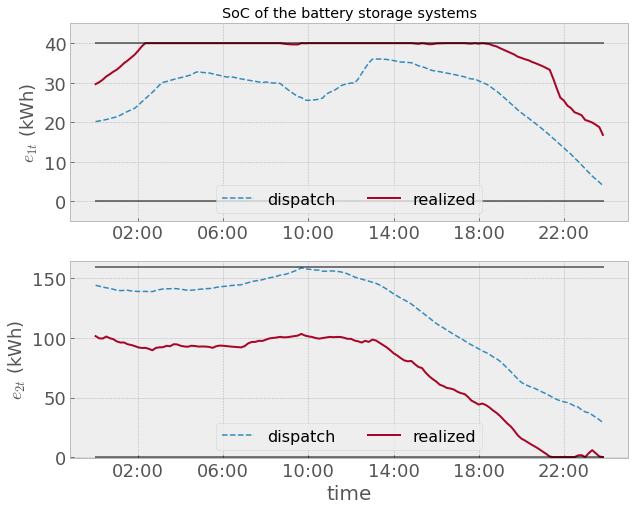

In [9]:
SOC = pd.DataFrame()
SOC['1'] = [20.171680059541885, 20.334442027758982, 20.497342649115133, 20.691503125067403, 20.931730193901252, 21.165029243557267, 21.366706453553753, 21.79507509636579, 22.306421874497364, 22.734467049116386, 23.12815696705523, 23.538613225619475, 24.306730795349747, 25.140717756162232, 25.96287401827031, 26.7586680399172, 27.57523714101362, 28.456365231012036, 29.436375768510704, 30.08771586161335, 30.31179616263796, 30.57778362328009, 30.837996385009003, 31.072314210781933, 31.287337020917782, 31.503551027125397, 31.760557076682087, 31.997787126734, 32.55243867108501, 32.81167514971081, 32.60634630235873, 32.520052699889334, 32.4616396683478, 32.24357583041455, 32.02805878009053, 31.829141774703043, 31.6319494307644, 31.42875505553996, 31.56105242918589, 31.36173359124826, 31.160333301425933, 30.968305969197804, 30.79731615642163, 30.645078734086088, 30.50340337682519, 30.352993306595476, 30.18715055039806, 30.017512450294248, 30.188469666419003, 30.02537632144918, 29.901977150546394, 29.953726144970695, 29.8228617309307, 29.086286834991405, 28.37869129206726, 27.703115422975113, 27.09959231333064, 26.482348243117784, 26.265249503015, 25.61539500305566, 25.53308047691531, 25.606929760521357, 25.703454592560696, 25.823198248750845, 26.117516717229496, 27.116867999064752, 27.573380106260743, 27.973470372681124, 28.457271090386527, 29.18480341376897, 29.51832445793846, 29.72134243865661, 29.918351480257492, 29.93405385590764, 30.91783708269211, 32.349467202813386, 33.72383939927025, 35.04348929928592, 35.93320311614433, 35.995348553162955, 35.99997411474655, 35.96189017537581, 35.88637514747883, 35.773641788008106, 35.60548118754663, 35.41954922496277, 35.23525378425963, 35.19877387709142, 35.13299113691849, 35.06330450833621, 34.69766549343117, 34.284101822584795, 34.04289752924543, 33.77227797793242, 33.32984264259671, 33.06670120613556, 32.9579596209221, 32.785029539276536, 32.621188539039395, 32.43114850781172, 32.27587540711587, 32.08974822619326, 31.87261066299225, 31.683628492470728, 31.49177994587258, 31.128585636091927, 30.9611594025045, 30.918115711025674, 30.459159540825432, 30.119695965395813, 29.66998243815855, 29.23586264645484, 28.490016073667153, 27.91115537787154, 27.121149497078033, 26.362528709426556, 25.583582207760863, 24.745288800851128, 23.988457577611197, 23.126589017249145, 22.42031698970024, 21.699337348424823, 21.07762418322258, 20.342423154500135, 19.672791164070567, 18.94082584681117, 18.246847879624017, 17.4841304393643, 16.73119812282067, 15.902970363608132, 15.143917883849896, 14.303240456154917, 13.52101189884696, 12.678781540503621, 11.927704130811529, 10.950228787931081, 10.120264653325938, 9.189505519794192, 8.26954869807844, 7.353644901766249, 6.378651607304656, 5.623029289358337, 4.8315655042147165, 3.9999991623968416]
SOC['2'] = [144.30496966122175, 143.55255124016588, 142.8275152096122, 142.1703203712922, 141.6591797681739, 140.94159588084432, 140.10862831022976, 139.83049816528506, 139.96206685896055, 140.1020977761208, 139.60223076475407, 139.29426780734346, 139.11545104942746, 139.18133206674838, 139.1812391888082, 138.92727395097958, 139.0052102970451, 139.88939406135833, 140.63361065889274, 141.2027122395747, 141.28685344767388, 141.40937989411157, 141.55231264695055, 141.4049816533484, 140.96630636917538, 140.4679944058109, 140.06847933226442, 140.2064503296794, 140.4651363413155, 140.8468327307204, 141.16023795433566, 141.42002458784012, 141.59376106121746, 141.69561107998126, 142.5853371856048, 142.94405302642517, 143.32100580202479, 143.55287086600848, 144.0247201785353, 144.30510760039144, 144.50883879416548, 144.7350102040027, 145.66253224510706, 146.4785696785858, 147.45178140290852, 147.92605456048452, 148.43560447755414, 148.93839083058316, 149.92382326652472, 150.5683313949693, 151.09777829360638, 151.84724032048766, 152.78448625159996, 153.12707434514473, 153.9691102507769, 154.97804719188935, 156.16806642347146, 157.30298494798555, 158.96287420852576, 158.14975549823947, 157.74298837141077, 157.5206613301496, 157.03700317289204, 156.97638428186104, 156.18489853313, 156.08629337786383, 156.35802278864458, 156.33834679256617, 155.96717294798145, 155.59154223864346, 154.89547979738643, 153.92045267322456, 152.55317102810307, 151.3143854081683, 150.23457254796787, 149.45778967236396, 148.63159639505085, 147.7310919257306, 146.9048054953257, 145.93812387570966, 144.62228394492067, 142.95389113769355, 141.1634200520203, 139.08159789133265, 137.13026803314463, 135.374270649986, 133.61306937622606, 132.03712704624246, 130.3857806982614, 128.5587969445502, 126.23953409421244, 123.81430981727851, 121.57638040710778, 119.22600781117342, 116.94474024898618, 114.62281350024794, 112.26533568752542, 110.37167762441705, 108.67063228410878, 106.6379903622359, 104.85878954635191, 103.10939299816484, 101.23566113656979, 99.63817133223897, 97.70817167471446, 95.74567159548238, 94.14499053697548, 92.44957221130403, 90.95119301513833, 89.13699965360298, 87.87833008327483, 86.39284468131098, 84.25537016145113, 82.59910086073941, 80.53281590980714, 77.743649634406, 74.8026424153518, 71.86152620250256, 68.73752804893371, 65.623044163169, 62.769062705376605, 61.17562311257854, 59.703355187006856, 58.62649804915391, 57.46891897914672, 55.98665116242564, 54.48350604744027, 53.18306604041705, 51.53596780695512, 49.90341198828101, 48.45408801021895, 47.19245069151084, 46.48966751545234, 45.7454016973697, 44.53435691356332, 42.92490804251302, 42.09245913595135, 39.61465489274043, 37.99141421427148, 37.18204483949267, 35.39715452854711, 33.37799255583218, 31.35397635085931, 28.999999445897814] 
a = [[29.642722857471888, 101.60055445003394], [30.1293822664792, 99.76299903195978], [30.765627104293877, 99.56021489340448], [31.58213708671076, 101.26344685972812], [32.15553795677251, 99.84382389943953], [32.79678738374468, 99.01185422846807], [33.32430583001786, 97.13360347080423], [34.08594256917866, 96.19497602154416], [34.94232870831215, 96.28892361919348], [35.59482463872297, 94.80508104690581], [36.35740262340419, 94.17058301607999], [37.093086360921276, 93.29121282105449], [38.08486648281847, 92.16043727846423], [39.18152052200617, 91.65879384089573], [39.999999656944105, 91.74875488549985], [40.00000000079898, 90.9421311991575], [39.99999995504417, 89.70749181121192], [39.999999999416396, 91.72288325826379], [39.99999999467969, 92.20057984091767], [40.000000000529894, 92.30458868130266], [39.99999998901647, 93.46932450203293], [39.99999777144392, 93.09347415522113], [40.00000000081156, 94.79305341581657], [39.99999999983464, 94.6209351582129], [39.99999999528194, 93.47033393505427], [39.99999998951198, 92.89265390505015], [40.00000000106423, 92.692615086833], [39.9999999969267, 93.51214219193244], [40.00000000101965, 93.30149529784488], [39.99999997853719, 92.84058830983616], [39.99999999393655, 92.88463367893223], [39.999999999957424, 92.82822376250886], [40.000000002313094, 92.53692522055385], [39.9999995958844, 91.74642292438625], [39.99999999802642, 93.13393557084225], [39.99981537406693, 93.65473822840606], [39.9999999782533, 93.4903195074203], [39.99999996706917, 93.15657273391622], [39.999997868010006, 92.87003825465374], [39.9999999921993, 92.60958339925492], [39.99999999444519, 92.26478333635995], [39.99999996308938, 92.12940090949547], [39.9999999508061, 93.1730357529841], [39.99999999887148, 95.50137893932649], [39.99998437707671, 96.69494365441025], [39.9999999863572, 96.76135443338855], [39.99999999649399, 97.68517470269396], [40.00000000149622, 97.55026604696064], [40.000000000918064, 98.61490100954975], [39.999999996202284, 99.67168492738689], [39.99999999855563, 100.00890179668936], [40.000000000551154, 100.43105890592841], [39.99999940491577, 101.0007539317926], [39.87016227706329, 100.5816871463027], [39.75761851512602, 100.67626923182463], [39.69538735085594, 101.11481939214663], [39.691912361321734, 101.60724452788021], [39.669135590532676, 102.04161969836343], [39.9999967661115, 103.45339444158026], [39.95134911244745, 102.09977763589737], [39.99999998958845, 101.37949280911197], [40.00000000076101, 100.91090685983458], [39.999999999107274, 100.00281304240556], [40.00000000094754, 99.48659951373187], [40.0000000003575, 99.98379366882135], [39.99999998490687, 100.38704383983436], [39.999999999915985, 100.96189038935083], [40.000000000869676, 100.7148799390743], [39.99999997716279, 100.88931386874766], [40.00000000105834, 100.90327921817064], [40.000000000687024, 100.25793376509817], [39.99999998392016, 99.3285641748959], [40.00000000094554, 99.31400616797329], [40.00000000181002, 97.85708078327221], [39.9999999982706, 97.24377422166454], [39.99999999138259, 96.1765671652845], [40.00000000069994, 97.65492964741941], [40.00000000033367, 96.76121791174278], [39.9999999938323, 98.68767060068218], [39.999999461504395, 97.96535734210703], [39.99999998892809, 96.09008935000304], [39.999999899489765, 94.22769105506394], [39.99999998201704, 92.2487688909335], [40.00000000093799, 89.91508111589488], [39.99999887290806, 87.2031083539197], [39.99999999688839, 85.34997799789703], [39.99999999351694, 83.13688266135357], [39.999999990180996, 81.22608173150846], [39.99999998807608, 80.43784527339952], [39.99999999862557, 80.76496367705342], [39.909557747106234, 78.02490578685729], [39.82630189724322, 75.732439093186], [39.98094281355535, 74.79302302262776], [39.88666452982331, 71.00724973121993], [39.72008944972944, 68.03576911118601], [39.74922806469638, 65.55746278568925], [39.926142762360136, 63.49946645394867], [39.95632319588021, 60.83856193042678], [39.999999989031885, 59.70710107655646], [39.999996159272854, 58.090756923077436], [40.000000000004, 57.593911398803215], [40.00000000097902, 56.73798878295905], [39.99996730557553, 54.90666015512807], [39.999922862694504, 53.69365701316552], [39.99999998895264, 52.96740771112804], [39.91346418936575, 50.46150052257006], [39.88094708396555, 47.33797685069101], [40.00000000054924, 45.80482079261368], [39.86536489115923, 44.1161295787827], [40.00000000098118, 44.981087900929154], [39.89999691908951, 43.722143639376135], [39.78386553111608, 41.75769772806121], [39.41557745009908, 39.2106326957993], [39.18935684133302, 37.16630587717114], [38.74102053682683, 34.56299929372662], [38.34104177244161, 31.430818091963594], [37.94259909369372, 28.36700394856815], [37.52277505497912, 25.835891222835883], [37.14160904927772, 22.299925539093454], [36.58127752580397, 18.289680335020627], [36.280714647979856, 15.575900751901955], [35.94557567870861, 13.961634898997897], [35.69409467991179, 12.073474012369818], [35.2653536602436, 10.231793886654236], [34.931917542785094, 8.605347990077485], [34.55062335751945, 6.727414815411175], [34.18177115683198, 4.682682313540655], [33.72959475886816, 2.761207469005512], [33.28163883998154, 0.5083036330015269], [31.045549600053906, 4.34608365962319e-08], [28.560496611743524, -3.7969520120621086e-10], [26.21474341051207, -7.092424425536592e-10], [25.484322252759874, 1.7541097463436017e-09], [24.208715533887897, 9.65845477670276e-10], [23.572609499801537, -5.462652552523648e-10], [22.53068382589393, 3.700506567838602e-11], [22.184143342191216, 1.394145716114643], [21.777699242620546, 1.6524549092449956], [20.584255145725816, -3.400504322570441e-10], [20.282806790319196, 3.2785814282988888], [19.93305910216762, 5.8328160613648095], [19.363360477887717, 3.1455995574334707], [18.75729298404623, 0.5670896042492428], [16.794558229859675, -9.302398851218641e-10]]
a = np.array(a).T.tolist()
SOC['1r'] = a[0]
SOC['2r'] = a[1]
SOC['1c-'] = [0 for t in range(144)]
SOC['1c+'] = [40 for t in range(144)]
SOC['2c-'] = [0 for t in range(144)]
SOC['2c+'] = [160 for t in range(144)]


w, h = 10, 4
plt.style.use('bmh')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
times = pd.date_range('01-01-2018', periods=144, freq='10MIN')
x_lab = times.strftime('%H:%M')
times = pd.date_range('01-01-2018 02:00', periods=6, freq='4H')
x_tik = times.strftime('%H:%M')
Fig = plt.figure()
Fig.set_figheight(h * 2)
Fig.set_figwidth(w)
ax = {}

ax[0] = Fig.add_subplot(2, 1, 1)
ax[0].plot(x_lab, SOC['1'], linewidth=1.5, linestyle='--')
ax[0].plot(x_lab, SOC['1r'], linewidth=2, linestyle='-')
ax[0].set_ylabel("$e_{1t}$ " + "(kWh)", fontsize=18)
plt.sca(ax[0])
plt.xticks(x_tik, x_tik)
Pnn = Pn.resample('1H').mean()
Pnn = Pnn.append(Pnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[0].legend(['dispatch', 'realized'], loc='center',bbox_to_anchor=(0.5, 0.11),  fontsize=16, ncol=2)
plt.title('SoC of the battery storage systems');
ax[0].plot(x_lab, SOC['1c+'], 'k', linewidth=2, alpha=0.5)
ax[0].plot(x_lab, SOC['1c-'], 'k', linewidth=2, alpha=0.5)
ax[0].set_ylim([-5, 45])


ax[1] = Fig.add_subplot(2, 1, 2)
ax[1].plot(x_lab, SOC['2'], linewidth=1.5, linestyle='--')
ax[1].plot(x_lab, SOC['2r'], linewidth=2, linestyle='-')
ax[1].set_ylabel("$e_{2t}$ " + "(kWh)", fontsize=18)
plt.sca(ax[1])
plt.xticks(x_tik, x_tik)
Qnn = Qn.resample('1H').mean()
Qnn = Qnn.append(Qnn.iloc[-1,:], ignore_index=True)
times = pd.date_range('01-01-2018', periods=24, freq='1H')
times = times.append(pd.date_range('01-01-2018 23:50', periods=1, freq='1H'))
x_labb = times.strftime('%H:%M')
ax[1].legend(['dispatch', 'realized'], loc='center',bbox_to_anchor=(0.5, 0.11),  fontsize=16, ncol=2)
ax[1].set_xlabel("time", fontsize=20)
ax[1].set_ylim([-1, 165])
ax[1].plot(x_lab, SOC['2c+'], 'k', linewidth=2, alpha=0.5)
ax[1].plot(x_lab, SOC['2c-'], 'k', linewidth=2, alpha=0.5)

plt.savefig('./Figures/' + 'SoC.pdf', bbox_inches='tight')